Description:

This is a experiment for logit regression.


Question 1:

Construct a dependent variable by drawing 200 observations from the standard
normal distribution. Also construct additional explanatory variables by just
drawing them the normal distribution. Divide the observations into an estimation
sample (first 100 observations) and a holdout sample (observations 101-200).

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)

#explanatory variable

y = np.random.normal(0,1,200)
#assuming we have three explanatory variables

x1 = np.random.normal(0,1,200)
x2 = np.random.normal(0,1,200)
x3 = np.random.normal(0,1,200)

df = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2, 'x3':x3})

est_sample = df[:100]
holdout_sample = df[100:]


Regress the dependent variable on the first explanatory variable using the
estimation sample. Calculate the mean absolute error (absolute value of the
difference between the actual value of 𝑦 and its predicted value according to
the regression (𝑋𝛽)). Calculate the mean absolute error separately for the
estimation sample and holdout sample, using the regression results (𝛼s and
𝛽s) from the estimation sample.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

x_est = est_sample[['x1']]
y_est = est_sample['y']

lr = LinearRegression()
lr.fit(x_est, y_est)
y_pred_est = lr.predict(x_est)

mae1 = mean_absolute_error(y_pred_est, y_est)

print ('mean absolute error between predicted y and y in estimation sample is', mae1)

y_holdout = holdout_sample['y']
x_holdout = holdout_sample[['x1']]
y_pred_holdout = lr.predict(x_holdout)
mae2 = mean_absolute_error(y_pred_holdout, y_holdout)

print ('mean absolute error between predicted y and y in holdout sample is', mae2)

mean absolute error between predicted y and y in estimation sample is 0.8060990146305606
mean absolute error between predicted y and y in holdout sample is 0.8411482872393956


Repeat step 𝑖 with each of the following number of (randomly drawn)
explanatory variables: 10, 20, 30, 40, 50, 60, 70, 80, and 90. What happens
to the mean absolute error as the number of random explanatory variables
increase? How does it differ between the estimation and holdout samples,
when using the regression results (𝛼s and 𝛽s?)

number of explanatory variables: [10 20 30 40 50 60 70 80 90]


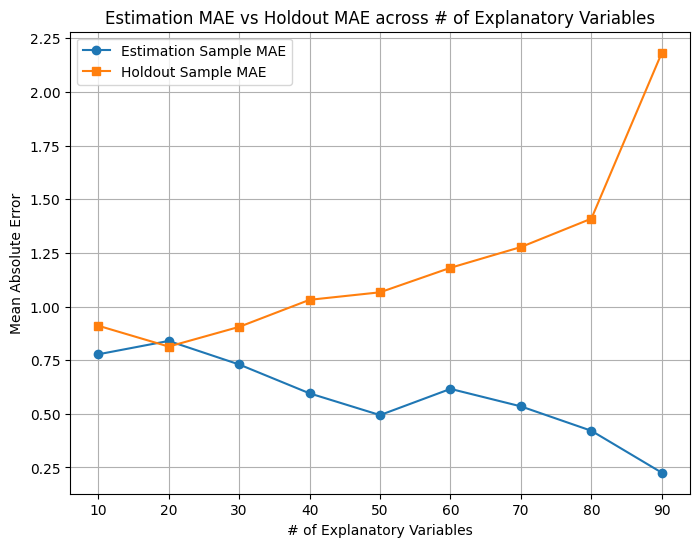

In [ ]:
#number of variables
var_num = np.array(range(10,91,10))
print ('number of explanatory variables:', var_num)

mae1 = []
mae2 = []



for var in var_num:
  x = np.random.normal(0,1,(200,var))
  y = np.random.normal(0,1,200)
  x_est = x[:100]
  y_est = y[:100]

  x_holdout = x[100:]
  y_holdout = y[100:]

  lr = LinearRegression()
  lr.fit(x_est, y_est)
  y_pred_est = lr.predict(x_est)
  y_pred_holdout = lr.predict(x_holdout)

  err1 = mean_absolute_error(y_pred_est, y_est)
  err2 = mean_absolute_error(y_pred_holdout, y_holdout)
  mae1.append(err1)
  mae2.append(err2)

#plot them in a graph

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(var_num, mae1, label="Estimation Sample MAE", marker="o")
plt.plot(var_num, mae2, label="Holdout Sample MAE", marker="s")
plt.xlabel("# of Explanatory Variables")
plt.ylabel("Mean Absolute Error")
plt.title("Estimation MAE vs Holdout MAE across # of Explanatory Variables")
plt.legend()
plt.grid()
plt.show()

Repeat part a (and parts 𝑖 and 𝑖𝑖) using 1,000 randomly drawn observations in the
estimation sample. What do you find? Are the findings the same or different from
part a? If so, how and why?

In [ ]:
np.random.seed(41)

#explanatory variable

y = np.random.normal(0,1,2000)
#assuming we have three explanatory variables

x1 = np.random.normal(0,1,2000)
x2 = np.random.normal(0,1,2000)
x3 = np.random.normal(0,1,2000)

df = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2, 'x3':x3})
#first 1000 for estimation sample, last 1000 for holdout sample
est_sample = df[:1000]
holdout_sample = df[1000:]

#part 1: regress the dependent variable on the first explanatory variable
x_est = est_sample[['x1']]
y_est = est_sample['y']

lr = LinearRegression()
lr.fit(x_est, y_est)
y_pred_est = lr.predict(x_est)

mae1 = mean_absolute_error(y_pred_est, y_est)

print ('mean absolute error between predicted y and y in estimation sample is', mae1)

y_holdout = holdout_sample['y']
x_holdout = holdout_sample[['x1']]
y_pred_holdout = lr.predict(x_holdout)
mae2 = mean_absolute_error(y_pred_holdout, y_holdout)

print ('mean absolute error between predicted y and y in holdout sample is', mae2)

mean absolute error between predicted y and y in estimation sample is 0.8060990146305606
mean absolute error between predicted y and y in holdout sample is 0.8411482872393956


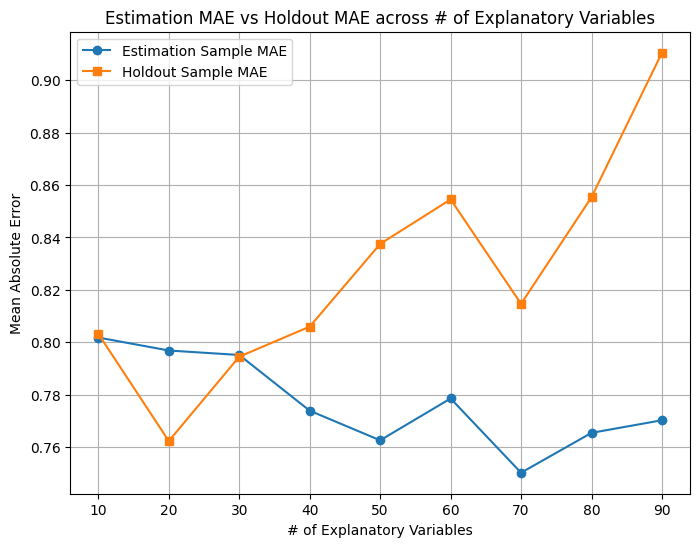

In [ ]:
#part 2: 1000 observations of 10 through 90 explanatory variables (with the inverval of 10)
var_num = np.array(range(10,91,10))

mae1 = []
mae2 = []



for var in var_num:
  x = np.random.normal(0,1,(2000,var))
  y = np.random.normal(0,1,2000)
  x_est = x[:1000]
  y_est = y[:1000]

  x_holdout = x[1000:]
  y_holdout = y[1000:]

  lr = LinearRegression()
  lr.fit(x_est, y_est)
  y_pred_est = lr.predict(x_est)
  y_pred_holdout = lr.predict(x_holdout)

  err1 = mean_absolute_error(y_pred_est, y_est)
  err2 = mean_absolute_error(y_pred_holdout, y_holdout)
  mae1.append(err1)
  mae2.append(err2)

#plot them in a graph

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(var_num, mae1, label="Estimation Sample MAE", marker="o")
plt.plot(var_num, mae2, label="Holdout Sample MAE", marker="s")
plt.xlabel("# of Explanatory Variables")
plt.ylabel("Mean Absolute Error")
plt.title("Estimation MAE vs Holdout MAE across # of Explanatory Variables")
plt.legend()
plt.grid()
plt.show()

In both experiments, the MAE of the holdout sample increases as the number of explanatory variables increases, and the MAE of the estimation sample decreases as the number of explanatory variables increases. But in the experiment with 1000 observations, the estimation and holdout sample MAE are lower.

Since the two randomly generated dataset have the same mean and standard deviation, haivng more observations make the data points more densely populated in a given area, which fits the linear model better and makes it easier for the model to predict.

Optional/Extra Credit. Repeat part a using a LASSO linear regression (note that
there are standard packages for this, it shouldn’t take many lines of code). What do
you find?

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)

#explanatory variable

y = np.random.normal(0,1,200)
#assuming we have three explanatory variables

x1 = np.random.normal(0,1,200)
x2 = np.random.normal(0,1,200)
x3 = np.random.normal(0,1,200)

df = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2, 'x3':x3})

est_sample = df[:100]
holdout_sample = df[100:]


from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso

x_est = est_sample[['x1']]
y_est = est_sample['y']

lasso = Lasso(alpha = 0.1)
lasso.fit(x_est, y_est)
y_pred_est = lasso.predict(x_est)

mae1 = mean_absolute_error(y_pred_est, y_est)

print ('mean absolute error between predicted y and y in estimation sample is', mae1)

y_holdout = holdout_sample['y']
x_holdout = holdout_sample[['x1']]
y_pred_holdout = lasso.predict(x_holdout)
mae2 = mean_absolute_error(y_pred_holdout, y_holdout)

print ('mean absolute error between predicted y and y in holdout sample is', mae2)

mean absolute error between predicted y and y in estimation sample is 0.7030630053248906
mean absolute error between predicted y and y in holdout sample is 0.7704454305546039


number of explanatory variables: [10 20 30 40 50 60 70 80 90]


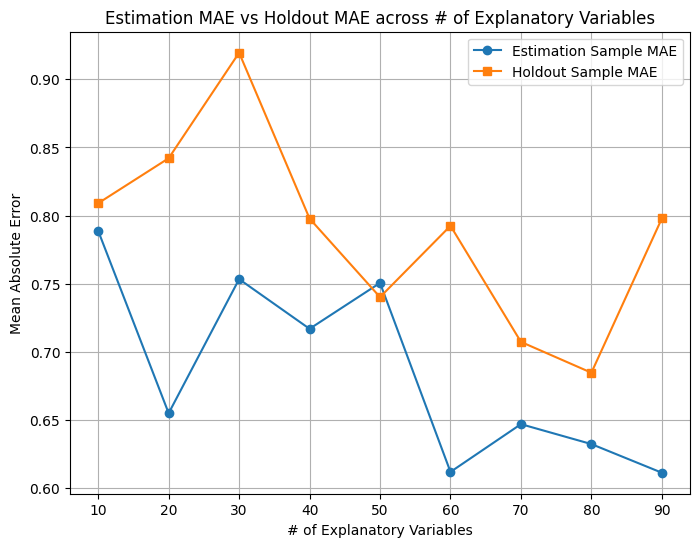

In [ ]:
var_num = np.array(range(10,91,10))
print ('number of explanatory variables:', var_num)

mae1 = []
mae2 = []



for var in var_num:
  x = np.random.normal(0,1,(200,var))
  y = np.random.normal(0,1,200)
  x_est = x[:100]
  y_est = y[:100]

  x_holdout = x[100:]
  y_holdout = y[100:]

  lasso = Lasso(alpha = 0.1)

  lasso.fit(x_est, y_est)
  y_pred_est = lasso.predict(x_est)
  y_pred_holdout = lasso.predict(x_holdout)

  err1 = mean_absolute_error(y_pred_est, y_est)
  err2 = mean_absolute_error(y_pred_holdout, y_holdout)
  mae1.append(err1)
  mae2.append(err2)

#plot them in a graph

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(var_num, mae1, label="Estimation Sample MAE", marker="o")
plt.plot(var_num, mae2, label="Holdout Sample MAE", marker="s")
plt.xlabel("# of Explanatory Variables")
plt.ylabel("Mean Absolute Error")
plt.title("Estimation MAE vs Holdout MAE across # of Explanatory Variables")
plt.legend()
plt.grid()
plt.show()

With lasso regression, the MAE of both estimation sample and holdout sample have a decreasing trend as the number of explanatory variables increases. Lasso regression selects the most important variables with L1 regularization, which filters out some less relevant variables. This helps the model to focus more on useful predictors.

Question 2: Logit Regression Model


In [ ]:
#write the database in python's form
import numpy as np
import pandas as pd

# Given parameters (initial)
alpha = 0.5
beta_hp = 0.01
beta_p = -0.5


products = pd.DataFrame({
    'product': ['Tesla Model S', 'Audi e-tron 4', 'Toyota Corolla'],
    'hp': [500, 250, 142],
    'price': [8.2, 4.1, 1.9]
})


choices = pd.DataFrame({
    'consumer': ['Fred', 'Jake', 'Samantha', 'Jerry', 'Chrissie', 'Lukas', 'Angela'],
    'choice': ['Tesla Model S', 'Audi e-tron 4', 'Tesla Model S',
               'Audi e-tron 4', 'Toyota Corolla', 'Audi e-tron 4', 'Tesla Model S']
})

#compute utility

products['utility'] = alpha + beta_hp * products['hp'] + beta_p * products['price']

#exponential utility:
exp_utility = np.exp(products['utility'])

#probability or consumer's choice:
products['probability'] = exp_utility / (1 + exp_utility.sum())

#merge the two dataframe
choices = choices.merge(products[['product', 'probability']],
                                                left_on='choice', right_on='product', how='left')
#we don't need two columns with the same information
choices = choices.drop('product',axis = 1)

print(choices)


   consumer          choice  probability
0      Fred   Tesla Model S     0.394519
1      Jake   Audi e-tron 4     0.251556
2  Samantha   Tesla Model S     0.394519
3     Jerry   Audi e-tron 4     0.251556
4  Chrissie  Toyota Corolla     0.256638
5     Lukas   Audi e-tron 4     0.251556
6    Angela   Tesla Model S     0.394519


In [ ]:
log_likelihood = np.sum(np.log(choices['probability']))
print ('log likelihood is',log_likelihood)

log likelihood is -8.290621484731501


In [ ]:
#copy and paste the original dataframe bc they were manipulated before
products = pd.DataFrame({
    'product': ['Tesla Model S', 'Audi e-tron 4', 'Toyota Corolla'],
    'hp': [500, 250, 142],
    'price': [8.2, 4.1, 1.9]
})


choices = pd.DataFrame({
    'consumer': ['Fred', 'Jake', 'Samantha', 'Jerry', 'Chrissie', 'Lukas', 'Angela'],
    'choice': ['Tesla Model S', 'Audi e-tron 4', 'Tesla Model S',
               'Audi e-tron 4', 'Toyota Corolla', 'Audi e-tron 4', 'Tesla Model S']
})

beta_hp_list = [.0001, .001,.01, .1]

log_likelihood_list = []
for hp in beta_hp_list:
  #make a copy of the dataframe for the for loop to run
  product = products.copy()
  choice = choices.copy()
  product['utility'] = alpha + hp * product['hp'] + beta_p * product['price']
  exp_utility = np.exp(product['utility'])
  product['probability'] = exp_utility / (1 + exp_utility.sum())

  choice = choice.merge(product[['product', 'probability']],
                                                left_on='choice', right_on='product', how='left')
  log_likelihood = np.sum(np.log(choice['probability']))
  log_likelihood_list.append(log_likelihood)

print (log_likelihood_list)







[-20.128283104335807, -18.54139736346754, -8.290621484731501, -101.5000000007552]


Takeway: a higher log likelihood indicates a better model fit. A very negative log-likelihood suggests that the estimated parameters do not explain the observed consumer choices well. If increasing beta_hp improves the log-likelihood initially but then worsens it, there is likely an optimal range for this parameter.

Horsepower does impact consumer choice, but only to a certain extent. Beyond a certain threshold, increasing its weight does not improve predictions. In this case, having beta_hp = .01 makes the best prediction.


In [ ]:
products = pd.DataFrame({
    'product': ['Tesla Model S', 'Audi e-tron 4', 'Toyota Corolla'],
    'hp': [500, 250, 142],
    'price': [8.2, 4.1, 1.9]
})


choices = pd.DataFrame({
    'consumer': ['Fred', 'Jake', 'Samantha', 'Jerry', 'Chrissie', 'Lukas', 'Angela'],
    'choice': ['Tesla Model S', 'Audi e-tron 4', 'Tesla Model S',
               'Audi e-tron 4', 'Toyota Corolla', 'Audi e-tron 4', 'Tesla Model S']
})

alpha = .5
beta_hp = .01
beta_p_list = [-0.1, -0.3,-0.5, -0.7, -0.9]

log_likelihood_list = []

for p in beta_p_list:
  #make a copy of the dataframe for the for loop to run
  product = products.copy()
  choice = choices.copy()
  product['utility'] = alpha + beta_hp * product['hp'] + p * product['price']
  exp_utility = np.exp(product['utility'])
  product['probability'] = exp_utility / (1 + exp_utility.sum())

  choice = choice.merge(product[['product', 'probability']],
                                                left_on='choice', right_on='product', how='left')
  log_likelihood = np.sum(np.log(choice['probability']))
  log_likelihood_list.append(log_likelihood)

print (log_likelihood_list)


[-10.41000593123796, -8.399521695860836, -8.290621484731501, -10.616654512727813, -14.923571989752961]


Takeway: like the result from the previous part, the log likelihood do not have the trend like the beta. This suggests that consumers are price sensitive, but underestimating or overestimating the price sensitivity can result in bad prediction. Among the beta_p we tested, -0.5 represents the best price sensitivity.